# Предсказание оценки ученика

In [219]:
import pandas as pd
import seaborn as sns

In [220]:
import numpy as np

In [221]:
from sklearn.model_selection import train_test_split
from category_encoders.target_encoder import TargetEncoder

In [222]:
import warnings
warnings.filterwarnings('ignore')

In [223]:
sns.set(rc={'figure.figsize': (4, 3)})

In [224]:
data = pd.read_csv('student-mat.csv')

<Axes: xlabel='G3', ylabel='Count'>

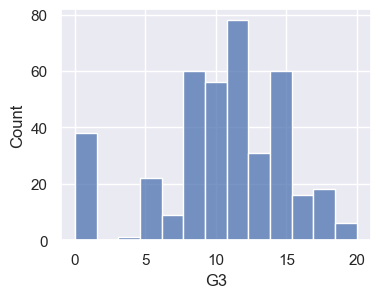

In [225]:
sns.histplot(data['G3'])

In [226]:
data = data[data['G3'] != 0]

data_y = data['G3']
data_x = data.drop(['G3'], axis=1)

In [227]:
X_train, X_test, y_train, y_test = train_test_split(data_x, data_y, test_size=50)

In [228]:
len(X_train)

307

In [229]:
len(X_test)

50

In [230]:
X_train

,school,gender,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,G1
271,GP,F,18,U,GT3,T,2,3,other,services,...,yes,yes,yes,yes,4,5,5,2,4,15
228,GP,M,18,U,LE3,T,2,1,at_home,other,...,yes,yes,yes,yes,4,3,2,3,14,10
391,MS,M,17,U,LE3,T,3,1,services,services,...,no,yes,yes,no,2,4,5,2,3,14
381,MS,M,18,R,GT3,T,2,1,other,other,...,no,yes,yes,yes,4,4,3,5,5,7
247,GP,M,22,U,GT3,T,3,1,services,services,...,no,no,yes,yes,5,4,5,1,16,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,GP,M,15,U,GT3,T,4,4,teacher,health,...,yes,yes,no,no,3,2,2,5,4,14
352,MS,M,18,U,LE3,T,1,3,at_home,services,...,yes,no,yes,yes,4,3,3,3,7,8
51,GP,F,15,U,LE3,T,4,2,health,other,...,yes,yes,yes,no,4,3,3,5,2,11
34,GP,M,16,U,GT3,T,3,2,other,other,...,no,yes,yes,no,5,4,3,5,0,12


In [231]:
X_y_train = X_train.copy(deep=True)
X_y_train['y'] = y_train

X_y_train.corr(numeric_only=True)   

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,health,absences,G1,y
age,1.000000,-0.140138,-0.150460,0.052379,0.014111,0.268231,0.090913,0.011411,0.120128,-0.040647,0.164032,-0.050840,-0.150154
Medu,-0.140138,1.000000,0.613943,-0.160119,0.072340,-0.202201,0.009563,0.029672,0.080085,-0.032021,0.063632,0.166371,0.183054
Fedu,-0.150460,0.613943,1.000000,-0.202420,-0.008950,-0.270256,0.033755,-0.033839,0.034617,0.013845,-0.027398,0.155953,0.154111
traveltime,0.052379,-0.160119,-0.202420,1.000000,-0.102995,0.131605,-0.011846,-0.004099,0.030154,-0.006903,0.000648,-0.078733,-0.073633
studytime,0.014111,0.072340,-0.008950,-0.102995,1.000000,-0.151718,0.055198,-0.143274,-0.027801,-0.046253,-0.075545,0.124529,0.116878
failures,0.268231,-0.202201,-0.270256,0.131605,-0.151718,1.000000,0.015226,0.136849,0.154747,0.050876,0.125619,-0.286876,-0.265705
famrel,0.090913,0.009563,0.033755,-0.011846,0.055198,0.015226,1.000000,0.116175,0.008615,0.166183,-0.035193,0.022412,0.036356
freetime,0.011411,0.029672,-0.033839,-0.004099,-0.143274,0.136849,0.116175,1.000000,0.265505,0.097803,-0.031007,0.008079,-0.014996
goout,0.120128,0.080085,0.034617,0.030154,-0.027801,0.154747,0.008615,0.265505,1.000000,-0.052260,0.057855,-0.161333,-0.165929
health,-0.040647,-0.032021,0.013845,-0.006903,-0.046253,0.050876,0.166183,0.097803,-0.052260,1.000000,-0.024813,-0.071981,-0.076255


In [232]:
corr = X_y_train.corr(numeric_only=True)['y']
corr_y = corr[(corr >= 0.1) | (corr <= -0.1)]
corr_y

age         -0.150154
Medu         0.183054
Fedu         0.154111
studytime    0.116878
failures    -0.265705
goout       -0.165929
absences    -0.224380
G1           0.893772
y            1.000000
Name: y, dtype: float64

<Axes: xlabel='G1', ylabel='Count'>

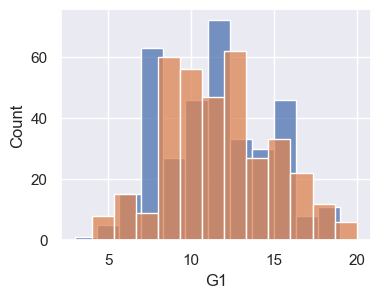

In [233]:
sns.histplot(data['G1'])
sns.histplot(data['G3'])

<Axes: xlabel='G1', ylabel='G3'>

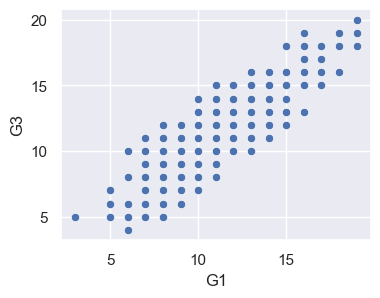

In [234]:
sns.scatterplot(x=data['G1'], y=data['G3'])

<Axes: xlabel='age', ylabel='G3'>

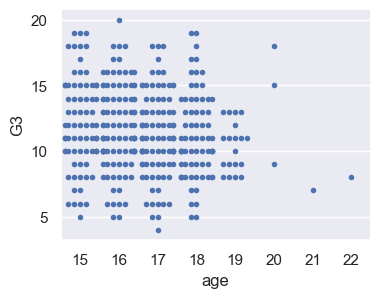

In [235]:
sns.swarmplot(x=data['age'], y=data['G3'], size=4)

## Подготовка факторов

In [236]:
numeric_factors_to_use = ['age', 'traveltime', 'G1', 'studytime', 'Medu', 'Fedu', 'failures']

categorical_columns = ['school', 'gender', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob',
                       'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
                       'higher', 'internet', 'romantic']

In [237]:
X_y_train \
    .groupby('higher', as_index=False) \
    .agg({'y': 'mean'})

,higher,y
0,no,9.714286
1,yes,11.658703


In [238]:
interesting_categorical_factors = ['Mjob', 'Fjob', 'schoolsup', 'higher']

In [239]:
Mjob_target_encoder = TargetEncoder()
Mjob_target_encoder.fit(X_y_train['Mjob'], X_y_train['y'])

Fjob_target_encoder = TargetEncoder()
Fjob_target_encoder.fit(X_y_train['Fjob'], X_y_train['y'])

schoolsup_target_encoder = TargetEncoder()
schoolsup_target_encoder.fit(X_y_train['schoolsup'], X_y_train['y'])

higher_target_encoder = TargetEncoder()
higher_target_encoder.fit(X_y_train['higher'], X_y_train['y'])

TargetEncoder(cols=['higher'])

In [240]:
X_y_train['Mjob_encoded'] = Mjob_target_encoder.transform(X_y_train['Mjob'])

X_y_train['Fjob_encoded'] = Fjob_target_encoder.transform(X_y_train['Fjob'])

X_y_train['schoolsup_encoded'] =schoolsup_target_encoder.transform(X_y_train['schoolsup'])

X_y_train['higher_encoded'] = higher_target_encoder.transform(X_y_train['higher'])

In [241]:
X_y_train

,school,gender,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,health,absences,G1,y,Mjob_encoded,Fjob_encoded,schoolsup_encoded,higher_encoded
271,GP,F,18,U,GT3,T,2,3,other,services,...,5,5,2,4,15,14,10.953797,11.500116,11.882576,11.658703
228,GP,M,18,U,LE3,T,2,1,at_home,other,...,3,2,3,14,10,9,10.958467,11.368421,9.826016,11.658703
391,MS,M,17,U,LE3,T,3,1,services,services,...,4,5,2,3,14,16,12.208445,11.500116,11.882576,11.658703
381,MS,M,18,R,GT3,T,2,1,other,other,...,4,3,5,5,7,7,10.953797,11.368421,11.882576,11.658703
247,GP,M,22,U,GT3,T,3,1,services,services,...,4,5,1,16,6,8,12.208445,11.500116,11.882576,10.912460
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,GP,M,15,U,GT3,T,4,4,teacher,health,...,2,2,5,4,14,15,11.889328,11.567010,11.882576,11.658703
352,MS,M,18,U,LE3,T,1,3,at_home,services,...,3,3,3,7,8,8,10.958467,11.500116,11.882576,10.912460
51,GP,F,15,U,LE3,T,4,2,health,other,...,3,3,5,2,11,13,12.294637,11.368421,11.882576,11.658703
34,GP,M,16,U,GT3,T,3,2,other,other,...,4,3,5,0,12,15,10.953797,11.368421,11.882576,11.658703


In [242]:
encoded_factors = ['Mjob_encoded', 'Fjob_encoded', 'schoolsup_encoded', 'higher_encoded']
needed_factors = numeric_factors_to_use + encoded_factors

In [243]:
X_train_encoded = X_y_train.copy(deep=True)

In [244]:
X_train_encoded = X_train_encoded[needed_factors]

In [245]:
from sklearn.preprocessing import MinMaxScaler

In [246]:
scaler = MinMaxScaler()

scaler.fit(X_train_encoded)

X_train_scaled = scaler.transform(X_train_encoded)

In [247]:
X_train_scaled

array([[0.42857143, 0.        , 0.75      , ..., 0.1206446 , 1.        ,
        1.        ],
       [0.42857143, 1.        , 0.4375    , ..., 0.        , 0.        ,
        1.        ],
       [0.28571429, 0.33333333, 0.6875    , ..., 0.1206446 , 1.        ,
        1.        ],
       ...,
       [0.        , 0.        , 0.5       , ..., 0.        , 1.        ,
        1.        ],
       [0.14285714, 0.        , 0.5625    , ..., 0.        , 1.        ,
        1.        ],
       [0.14285714, 0.        , 0.6875    , ..., 0.18192509, 1.        ,
        1.        ]])

X_train_encoded

## Создание модели

In [248]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

In [249]:
model.fit(X_train_scaled, y_train)
print(model.score(X_train_scaled, y_train))

0.811952098224293


## Тест модели

In [250]:
X_y_test = X_test.copy(deep=True)
X_y_test['y'] = y_test

In [251]:
X_y_test

,school,gender,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,higher,internet,romantic,famrel,freetime,goout,health,absences,G1,y
369,MS,F,18,R,GT3,T,4,4,other,teacher,...,yes,yes,yes,3,2,2,5,10,14,11
384,MS,M,18,R,GT3,T,4,2,other,other,...,yes,no,no,5,4,3,3,14,6,5
190,GP,F,16,U,GT3,T,2,3,services,services,...,yes,yes,no,4,3,3,2,10,11,13
375,MS,F,18,R,GT3,T,1,1,other,other,...,yes,yes,no,4,3,2,4,2,8,10
357,MS,F,17,U,LE3,A,3,2,services,other,...,yes,no,yes,1,2,3,5,2,12,11
315,GP,F,19,R,GT3,T,2,3,other,other,...,yes,yes,yes,4,1,2,3,40,13,11
47,GP,M,16,U,GT3,T,4,3,health,services,...,yes,yes,no,4,2,2,2,4,19,20
87,GP,F,15,U,GT3,T,4,2,other,other,...,yes,yes,no,5,3,3,1,4,13,14
123,GP,M,16,U,GT3,T,4,4,health,other,...,yes,yes,no,3,4,4,5,18,14,13
266,GP,M,17,U,GT3,T,3,1,services,other,...,yes,yes,yes,5,4,4,5,2,9,10


In [252]:
Mjob_target_encoder = TargetEncoder()
Mjob_target_encoder.fit(X_y_test['Mjob'], X_y_test['y'])

Fjob_target_encoder = TargetEncoder()
Fjob_target_encoder.fit(X_y_test['Fjob'], X_y_test['y'])

schoolsup_target_encoder = TargetEncoder()
schoolsup_target_encoder.fit(X_y_test['schoolsup'], X_y_test['y'])

higher_target_encoder = TargetEncoder()
higher_target_encoder.fit(X_y_test['higher'], X_y_test['y'])

TargetEncoder(cols=['higher'])

In [253]:
X_y_test['Mjob_encoded'] = Mjob_target_encoder.transform(X_y_test['Mjob'])

X_y_test['Fjob_encoded'] = Fjob_target_encoder.transform(X_y_test['Fjob'])

X_y_test['schoolsup_encoded'] =schoolsup_target_encoder.transform(X_y_test['schoolsup'])

X_y_test['higher_encoded'] = higher_target_encoder.transform(X_y_test['higher'])

In [254]:
X_y_test

,school,gender,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,health,absences,G1,y,Mjob_encoded,Fjob_encoded,schoolsup_encoded,higher_encoded
369,MS,F,18,R,GT3,T,4,4,other,teacher,...,2,2,5,10,14,11,10.950987,11.654095,11.508013,11.24
384,MS,M,18,R,GT3,T,4,2,other,other,...,4,3,3,14,6,5,10.950987,10.916321,11.508013,11.24
190,GP,F,16,U,GT3,T,2,3,services,services,...,3,3,2,10,11,13,11.236937,11.168767,11.508013,11.24
375,MS,F,18,R,GT3,T,1,1,other,other,...,3,2,4,2,8,10,10.950987,10.916321,11.508013,11.24
357,MS,F,17,U,LE3,A,3,2,services,other,...,2,3,5,2,12,11,11.236937,10.916321,11.508013,11.24
315,GP,F,19,R,GT3,T,2,3,other,other,...,1,2,3,40,13,11,10.950987,10.916321,11.508013,11.24
47,GP,M,16,U,GT3,T,4,3,health,services,...,2,2,2,4,19,20,11.753003,11.168767,11.508013,11.24
87,GP,F,15,U,GT3,T,4,2,other,other,...,3,3,1,4,13,14,10.950987,10.916321,11.508013,11.24
123,GP,M,16,U,GT3,T,4,4,health,other,...,4,4,5,18,14,13,11.753003,10.916321,11.508013,11.24
266,GP,M,17,U,GT3,T,3,1,services,other,...,4,4,5,2,9,10,11.236937,10.916321,11.508013,11.24


In [255]:
X_test_encoded = X_y_test.copy(deep=True)
X_test_encoded = X_test_encoded[needed_factors]

In [256]:
X_test_encoded

,age,traveltime,G1,studytime,Medu,Fedu,failures,Mjob_encoded,Fjob_encoded,schoolsup_encoded,higher_encoded
369,18,3,14,2,4,4,0,10.950987,11.654095,11.508013,11.24
384,18,2,6,1,4,2,1,10.950987,10.916321,11.508013,11.24
190,16,1,11,2,2,3,0,11.236937,11.168767,11.508013,11.24
375,18,4,8,3,1,1,0,10.950987,10.916321,11.508013,11.24
357,17,2,12,2,3,2,0,11.236937,10.916321,11.508013,11.24
315,19,1,13,3,2,3,1,10.950987,10.916321,11.508013,11.24
47,16,1,19,4,4,3,0,11.753003,11.168767,11.508013,11.24
87,15,1,13,3,4,2,0,10.950987,10.916321,11.508013,11.24
123,16,1,14,1,4,4,0,11.753003,10.916321,11.508013,11.24
266,17,1,9,2,3,1,0,11.236937,10.916321,11.508013,11.24


In [257]:
scaler = MinMaxScaler()

scaler.fit(X_test_encoded)

X_test_scaled = scaler.transform(X_test_encoded)

In [258]:
X_test_scaled

array([[0.75      , 0.66666667, 0.64285714, 0.33333333, 1.        ,
        1.        , 0.        , 0.00406728, 1.        , 1.        ,
        0.        ],
       [0.75      , 0.33333333, 0.07142857, 0.        , 1.        ,
        0.33333333, 0.33333333, 0.00406728, 0.        , 1.        ,
        0.        ],
       [0.25      , 0.        , 0.42857143, 0.33333333, 0.33333333,
        0.66666667, 0.        , 0.35915599, 0.34217246, 1.        ,
        0.        ],
       [0.75      , 1.        , 0.21428571, 0.66666667, 0.        ,
        0.        , 0.        , 0.00406728, 0.        , 1.        ,
        0.        ],
       [0.5       , 0.33333333, 0.5       , 0.33333333, 0.66666667,
        0.33333333, 0.        , 0.35915599, 0.        , 1.        ,
        0.        ],
       [1.        , 0.        , 0.57142857, 0.66666667, 0.33333333,
        0.66666667, 0.33333333, 0.00406728, 0.        , 1.        ,
        0.        ],
       [0.25      , 0.        , 1.        , 1.        , 1.

In [274]:
print(model.score(X_test_scaled, y_test))


predictions = model.predict(X_test_scaled)

0.6679239889798403


## Оценка качества


In [275]:
import random
from math import floor

In [276]:
def cut_on_edges(l, fraction_to_cut):
    to_cut = floor(len(l) * fraction_to_cut)
    return l[to_cut:len(l) - to_cut]

In [277]:
def bootstrap_confidence_interval_solution(y, y_pred, fraction_to_cut):
    bs_y_and_y_pred = list(zip(y, y_pred))
    bs_interval = []
    
    for n in range(10_000):
        bs_sample = random.choices(bs_y_and_y_pred, k=len(y))
        bs_sum = 0
        for t_y, t_y_pred in bs_sample:
            bs_sum += abs(t_y - t_y_pred)
            
        bs_sum /= len(y)
        bs_interval.append(bs_sum)
    
    bs_interval.sort()
    bs_interval = cut_on_edges(bs_interval, fraction_to_cut)
    return round(bs_interval[0], 3), round(bs_interval[-1], 3)

In [281]:
interval = bootstrap_confidence_interval_solution(y_test, predictions, 0.025)

In [283]:
float(interval[0]), float(interval[1])

(1.207, 1.811)